In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import datetime as dt
from scipy.stats import pearsonr
import glob
from dateutil.parser import parse


In [2]:
dir = str(os.getcwd())
path_full = dir +'\\analysis_data.csv'
path_msta = dir +'\\mstation_data.csv'
path_ssta = dir +'\\sstation_data.csv'

In [4]:
full_data = pd.read_csv(path_full)
df_mstation = pd.read_csv(path_msta)
df_sstation = pd.read_csv(path_ssta)


In [5]:
# construct percentage differenc from roling mean
full_data['z_sqm_price'] = (full_data.sqm_price -\
                            full_data.sqm_price.rolling(window=30).mean())\
                            / full_data.sqm_price.rolling(window=30).mean()*100


In [15]:
full_data['Date_of_sale'] = full_data['Date_of_sale'].apply(lambda x: str(x))
full_data['Date_of_sale'] = full_data['Date_of_sale'].apply(lambda x: parse(x))

In [16]:
m2002 = ['Sundby', 'Ørestad', 'Nørreport', 'Lergravsparken', 'Kongens Nytorv', 'Islands Brygge', 'DR Byen', 'Bella Center', 'Amagerbro']
m2003 = ['Fasanvej', 'Forum', 'Frederiksberg', 'Lindevang']
m2004 = ['Flintholm']
m2007 = ['Amager Strand', 'Øresund','Femøren', 'Kastrup']

In [17]:
open2002 = full_data.loc[full_data['m_station'].isin(m2002)]
open2003 = full_data.loc[full_data['m_station'].isin(m2003)]
open2004 = full_data.loc[full_data['m_station'].isin(m2004)]
open2007 = full_data.loc[full_data['m_station'].isin(m2007)]

open2002_c = full_data.loc[full_data['m_station_const'].isin(m2002)]
open2003_c = full_data.loc[full_data['m_station_const'].isin(m2003)]
open2004_c = full_data.loc[full_data['m_station_const'].isin(m2004)]
open2007_c = full_data.loc[full_data['m_station_const'].isin(m2007)]

In [18]:
distance_to_metro2002 = open2002['m_distance']
distance_to_metro2003 = open2003['m_distance']
distance_to_metro2004 = open2004['m_distance']
distance_to_metro2007 = open2007['m_distance']

open2002.insert(0, 'distance_to_metro', distance_to_metro2002)
open2003.insert(0, 'distance_to_metro', distance_to_metro2003)
open2004.insert(0, 'distance_to_metro', distance_to_metro2004)
open2007.insert(0, 'distance_to_metro', distance_to_metro2007)

In [19]:
distance_to_metro2002 = open2002_c['m_distance_const']
distance_to_metro2003 = open2003_c['m_distance_const']
distance_to_metro2004 = open2004_c['m_distance_const']
distance_to_metro2007 = open2007_c['m_distance_const']

open2002_c.insert(0, 'distance_to_metro', distance_to_metro2002)
open2003_c.insert(0, 'distance_to_metro', distance_to_metro2003)
open2004_c.insert(0, 'distance_to_metro', distance_to_metro2004)
open2007_c.insert(0, 'distance_to_metro', distance_to_metro2007)

In [20]:
open2002 = open2002.append(open2002_c, ignore_index=True)
open2003 = open2003.append(open2003_c, ignore_index=True)
open2004 = open2004.append(open2004_c, ignore_index=True)
open2007 = open2007.append(open2007_c, ignore_index=True)

In [21]:
def group_dist(dist):
    if dist < 0.5:
        x = 'Less than 0.5 km'
    elif dist >= 0.5 and dist <= 1:
        x = '0.5 -1 km'
    else:
        x = 'Above 1 km'
    return x

dist_group2002 = open2002['distance_to_metro'].apply(lambda x: group_dist(x))
dist_group2003 = open2003['distance_to_metro'].apply(lambda x: group_dist(x))
dist_group2004 = open2004['distance_to_metro'].apply(lambda x: group_dist(x))
dist_group2007 = open2007['distance_to_metro'].apply(lambda x: group_dist(x))
open2002.insert(1, 'Grouped_distance', dist_group2002)
open2003.insert(1, 'Grouped_distance', dist_group2003)
open2004.insert(1, 'Grouped_distance', dist_group2004)
open2007.insert(1, 'Grouped_distance', dist_group2007)

In [22]:
open2002['Date_of_sale'] = open2002['Date_of_sale'].apply(lambda x: x.year)
open2003['Date_of_sale'] = open2003['Date_of_sale'].apply(lambda x: x.year)
open2004['Date_of_sale'] = open2004['Date_of_sale'].apply(lambda x: x.year)
open2007['Date_of_sale'] = open2007['Date_of_sale'].apply(lambda x: x.year)

Text(0, 0.5, '%-difference in square meter price from rolling mean')

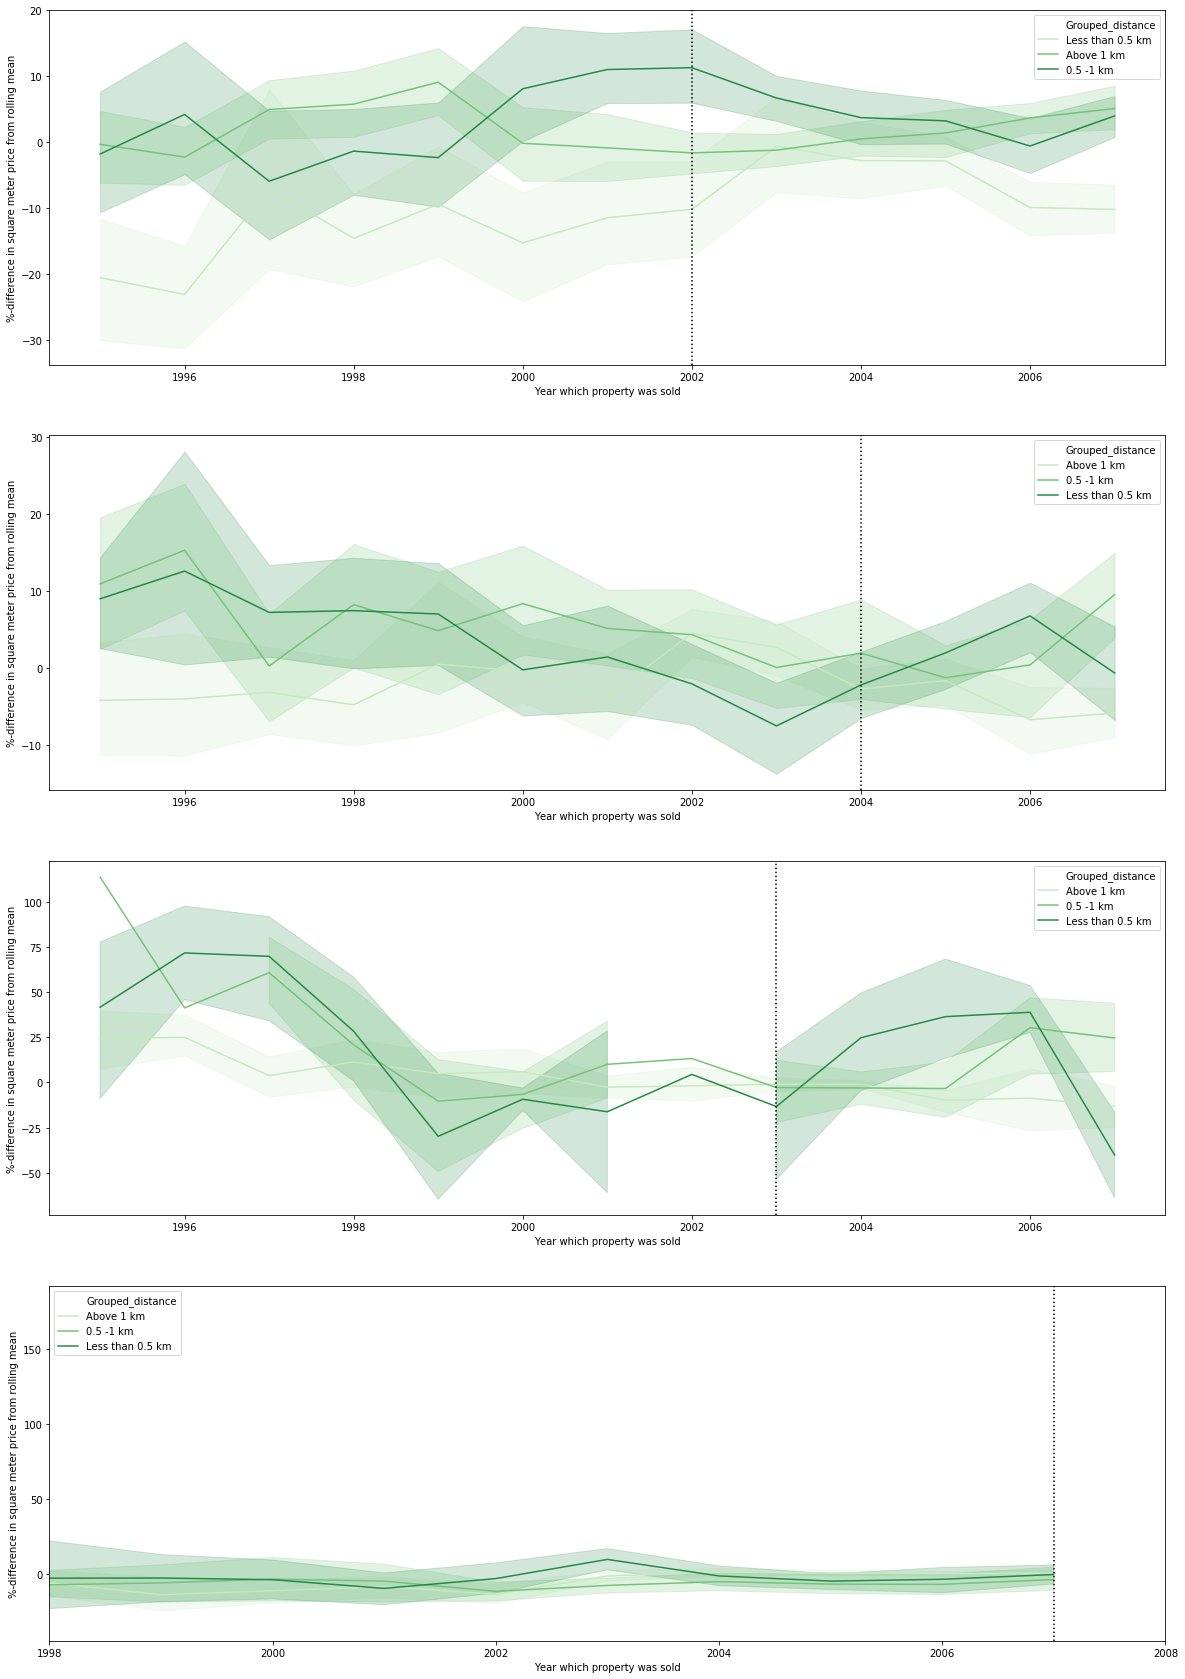

In [23]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(20, 30))
sns.lineplot(data=open2002, x='Date_of_sale', y='z_sqm_price', hue='Grouped_distance', palette='Greens', ax=ax1)
ax1.axvline(2002, color='k', linestyle=':')
ax1.set_xlabel("Year which property was sold")
ax1.set_ylabel("%-difference in square meter price from rolling mean")
sns.lineplot(data=open2003, x='Date_of_sale', y='z_sqm_price', hue='Grouped_distance', palette='Greens', ax=ax2)
ax2.axvline(2004, color='k', linestyle=':')
ax2.set_xlabel("Year which property was sold")
ax2.set_ylabel("%-difference in square meter price from rolling mean")
sns.lineplot(data=open2004, x='Date_of_sale', y='z_sqm_price', hue='Grouped_distance', palette='Greens', ax=ax3)
ax3.axvline(2003, color='k', linestyle=':')
ax3.set_xlabel("Year which property was sold")
ax3.set_ylabel("%-difference in square meter price from rolling mean")
sns.lineplot(data=open2007, x='Date_of_sale', y='z_sqm_price', hue='Grouped_distance', palette='Greens', ax=ax4)
ax4.axvline(2007, color='k', linestyle=':')
ax4.set_xlim(1998,2008)
ax4.set_xlabel("Year which property was sold")
ax4.set_ylabel("%-difference in square meter price from rolling mean")

